<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#View-images-with-Napari" data-toc-modified-id="View-images-with-Napari-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>View images with Napari</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Napari-examples" data-toc-modified-id="Napari-examples-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Napari examples</a></span></li><li><span><a href="#Plot-single-image" data-toc-modified-id="Plot-single-image-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>Plot single image</a></span></li><li><span><a href="#Plot-image-series" data-toc-modified-id="Plot-image-series-1.0.3"><span class="toc-item-num">1.0.3&nbsp;&nbsp;</span>Plot image series</a></span></li><li><span><a href="#Working-with-binary-masks" data-toc-modified-id="Working-with-binary-masks-1.0.4"><span class="toc-item-num">1.0.4&nbsp;&nbsp;</span>Working with binary masks</a></span></li><li><span><a href="#Misc" data-toc-modified-id="Misc-1.0.5"><span class="toc-item-num">1.0.5&nbsp;&nbsp;</span>Misc</a></span></li><li><span><a href="#Edge-detection" data-toc-modified-id="Edge-detection-1.0.6"><span class="toc-item-num">1.0.6&nbsp;&nbsp;</span>Edge detection</a></span></li></ul></li></ul></li><li><span><a href="#Analyse-aligned-images" data-toc-modified-id="Analyse-aligned-images-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Analyse aligned images</a></span><ul class="toc-item"><li><span><a href="#Single-image" data-toc-modified-id="Single-image-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Single image</a></span><ul class="toc-item"><li><span><a href="#Area" data-toc-modified-id="Area-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Area</a></span></li><li><span><a href="#Anisotropic-growth" data-toc-modified-id="Anisotropic-growth-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Anisotropic growth</a></span></li><li><span><a href="#Centre-of-mass-dynamics" data-toc-modified-id="Centre-of-mass-dynamics-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Centre of mass dynamics</a></span></li></ul></li><li><span><a href="#Apply-to-all-images" data-toc-modified-id="Apply-to-all-images-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Apply to all images</a></span><ul class="toc-item"><li><span><a href="#Plot-areas" data-toc-modified-id="Plot-areas-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Plot areas</a></span></li><li><span><a href="#Plot-center-of-mass" data-toc-modified-id="Plot-center-of-mass-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Plot center of mass</a></span></li></ul></li></ul></li><li><span><a href="#Plots-areas-WT-vs-BAPN" data-toc-modified-id="Plots-areas-WT-vs-BAPN-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plots areas WT vs BAPN</a></span><ul class="toc-item"><li><span><a href="#Load-area-data" data-toc-modified-id="Load-area-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Load area data</a></span></li><li><span><a href="#Check-for-covariates" data-toc-modified-id="Check-for-covariates-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Check for covariates</a></span><ul class="toc-item"><li><span><a href="#Combined-data" data-toc-modified-id="Combined-data-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Combined data</a></span></li><li><span><a href="#Old-data" data-toc-modified-id="Old-data-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Old data</a></span></li></ul></li><li><span><a href="#Perimeter" data-toc-modified-id="Perimeter-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Perimeter</a></span><ul class="toc-item"><li><span><a href="#Perimeter-vs-Area" data-toc-modified-id="Perimeter-vs-Area-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Perimeter vs Area</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import os
import seaborn as sns

# View images with Napari

### Napari examples

In [2]:
import napari
from skimage import data

#viewer = napari.view_image(data.astronaut(), rgb=True)

viewer = napari.Viewer()
new_layer = viewer.add_image(data.astronaut(), rgb=True)

In [3]:
import napari
from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label
from skimage.morphology import closing, square, remove_small_objects

coins = data.coins()[50:-50, 50:-50]
# apply threshold
thresh = threshold_otsu(coins)
bw = closing(coins > thresh, square(4))
# remove artifacts connected to image border
cleared = remove_small_objects(clear_border(bw), 20)
# label image regions
label_image = label(cleared)

# create the viewer and add the coins image
viewer = napari.view_image(coins, name='coins')
# add the labels
labels_layer = viewer.add_labels(label_image, name='segmentation')

### Plot single image

In [84]:
# Plot single image
import napari
from skimage import io
from skimage import data
#from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label
from skimage.morphology import closing, square, remove_small_objects

# User input
folder_to_load = "/Users/dang/Documents/Projects/Tabler_skull/Data_fixed_tissue/Skull_expansion_thresholded/pilot_elastix_out/"
fname_load = "170919 SP7 mCherry Skullcap Overview E13.0_63x_Skull_1_0_2200.tif";
image_to_load = os.path.join(folder_to_load, fname_load)
thresh = 2; # manual intensity threshold

# Load image
img = io.imread(image_to_load)

# apply threshold
bw = closing(img > thresh, square(4))
# remove artifacts connected to image border
#cleared = remove_small_objects(clear_border(bw), 2000)
cleared = remove_small_objects(bw, 2000)

# label image regions
label_image = label(cleared)

# create the viewer and add the coins image
viewer = napari.view_image(img, name='image')
# add the labels
labels_layer = viewer.add_labels(label_image, name='segmentation')
#labels_layer = viewer.add_labels(label_image, name='segmentation', color={'1': [0.21568627, 0.49411765, 0.72156863, 1.        ]})

FileNotFoundError: [Errno 2] No such file or directory: '/Users/dang/Documents/Projects/Tabler_skull/Data_fixed_tissue/Skull_expansion_thresholded/pilot_elastix_out/170919 SP7 mCherry Skullcap Overview E13.0_63x_Skull_1_0_2200.tif'

In [ ]:
viewer = napari.view_image(img, name='image')
temp=np.array([label_image, label_image])
labels_layer = viewer.add_labels(temp, name='segmentation')

In [82]:
?viewer.add_labels

### Plot image series

In [35]:
# Load image series 
# Load only .tif files from folder
# folder_to_load = "/Users/dang/Documents/Projects/Tabler_skull/Data_fixed_tissue/Skull_expansion_thresholded/old_Allyson/sample_elastix_Similarity_no_mask/"
# folder_to_load = "/Users/dang/Documents/Projects/Tabler_skull/Data_fixed_tissue/Skull_expansion_transformed/ref_imgs_Euler_run1"
# folder_to_load = "/Users/dang/Documents/Projects/Tabler_skull/Data_skull_expansion/series1_transformed/ref_imgs_Euler_run2"
# folder_to_load = "/Users/dang/Documents/Projects/Tabler_skull/Data_skull_expansion/series1_transformed/E13.0_Euler"
# folder_to_load = "/Users/dang/Documents/Projects/Tabler_skull/Data_skull_expansion/series1_transformed/E14.0_Euler"
# folder_to_load = "/Users/dang/Documents/Projects/Tabler_skull/Data_skull_expansion/series1_transformed/E14.5_Euler"
# folder_to_load = "/Users/dang/Documents/Projects/Tabler_skull/Data_skull_expansion/series1_transformed/E15.0_Euler"
# folder_to_load = "/Users/dang/Documents/Projects/Tabler_skull/Data_skull_expansion/series1_transformed/E15.5_Euler"

base_folder = "/Users/dang/Documents/Projects/Tabler_skull/Data_skull_expansion/series1_transformed/"
# folder_to_load = base_folder+"ref_imgs_Euler_run2"
folder_to_load = base_folder+"E13.0_Euler"

files = os.listdir( folder_to_load )
files.sort()
files_to_load = [];
for i in range(len(files)):
    if files[i].endswith('.tif'):
        files_to_load.append(files[i])
files_to_load

['E13.0_170919_Skull_1_ref.tif',
 'E13.0_170919_Skull_2_thresholded_aligned-ch0.tif',
 'E13.0_170919_Skull_3_aligned-ch0.tif',
 'E13.0_180220_Skull_1L_aligned-ch0.tif',
 'E13.0_180220_Skull_1R_aligned-ch0.tif',
 'E13.0_180220_Skull_2L_aligned-ch0.tif',
 'E13.0_180220_Skull_2R_aligned-ch0.tif',
 'E13.0_180220_Skull_3_aligned-ch0.tif']

In [30]:
file_ids = [None for _ in range(len(files_to_load))];
for i in range(len(file_ids)):
    file_ids[i] = files_to_load[i].split(sep='.tif')[0]
    
file_ids

['E15.5_170919_Skull_4_thresholded_aligned-ch0',
 'E15.5_170919_Skull_5L_thresholded_aligned-ch0',
 'E15.5_vs_E15.0-ch0']

In [31]:
# List of layer names
layer_names = file_ids;
#layer_names = ['E13.0', 'E14.0_tf', 'E14.5_tf', 'E15.0_tf', 'E15.5_tf']
# layer_names = [
#     'E15.0_a', 
#     'E13.5',
#     'E14.5',
#     'E15.0_b',
#     'E15.5_1',
#     'E15.5_2',
#     'E14.0'
# ]

In [32]:
# Plot image series
import napari
from skimage import io
from skimage import data
#from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label
from skimage.morphology import closing, square, remove_small_objects

# User input
# folder_to_load = "/Users/dang/Documents/Projects/Tabler_skull/Data_fixed_tissue/Data_Allyson_thresholded/selected_images/"
viewer = napari.Viewer()
labels_all = [];
for i in range(len(files_to_load)):
    thresh = 5; # manual intensity threshold

    # Load image
    image_to_load = os.path.join(folder_to_load, files_to_load[i])
    img = io.imread(image_to_load)

    # apply threshold
    bw = closing(img > thresh, square(4))
    
    # remove artifacts connected to image border
    cleared = remove_small_objects(bw, 10)
    #cleared = remove_small_objects(clear_border(bw), 10)
    
    # label image regions
    label_image = label(cleared)

    # create the viewer and add the coins image
    #new_layer = viewer.add_image(img, name='image')
    #labels_all.append(label_image);

    # add the labels
    #labels_all = np.array(labels_all)
    labels_layer = viewer.add_labels(label_image, name=layer_names[i])
    

### Working with binary masks

In [121]:
# Convert a mask file to a binary image
mask_file = "/Users/dang/Documents/Projects/Tabler_skull/Data_fixed_tissue/Skull_expansion_thresholded/pilot_thresholded/E14.5 mask_inverted.txt"
mask = pd.read_table(mask_file)
# replace 255 by 1
d = {255: 1};
mask = mask.replace(d)
mask

,255,255.1,255.2,255.3,255.4,255.5,255.6,255.7,255.8,255.9,...,255.4238,255.4239,255.4240,255.4241,255.4242,255.4243,255.4244,255.4245,255.4246,255.4247
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2826,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2827,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2828,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2829,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [125]:
# Save mask file
save_file = "/Users/dang/Documents/Projects/Tabler_skull/Data_fixed_tissue/Skull_expansion_thresholded/pilot_thresholded/E14.5 mask_binary.txt"
mask.to_csv(save_file, header=False, index=False, sep='\t')

In [129]:
# Load saved file
temp=pd.read_table(save_file)

### Misc

In [40]:
# List files in folder
folder = "/Users/dang/Documents/Projects/Tabler_skull/Data_fixed_tissue/Skull_expansion_thresholded/E14.5_63x"
files = os.listdir( folder )
files.sort()
files_to_display = [];
for i in range(len(files)):
    if files[i].endswith('.tif'):
        file = files[i].split(sep='.tif')[0];
        files_to_display.append(file)
        print('"{}",'.format(file))
# files_to_display

"E14.5_170919_Skull_1R_thresholded",
"E14.5_170919_Skull_2L_thresholded",
"E14.5_180220_Skull_2_thresholded",


In [173]:
# make list of colors from matplotlib
from matplotlib import cm
cmap = cm.get_cmap('Set1')
colors=cmap(np.linspace(0, 1, len(files_to_load) ))
colors

array([[0.89411765, 0.10196078, 0.10980392, 1.        ],
       [0.30196078, 0.68627451, 0.29019608, 1.        ],
       [1.        , 0.49803922, 0.        , 1.        ],
       [0.65098039, 0.3372549 , 0.15686275, 1.        ],
       [0.6       , 0.6       , 0.6       , 1.        ]])

### Edge detection

In [206]:
# Print a 45 degree convolution kernel
s=5;
mat = np.zeros((s, s));

for i in range(s-1):
    mat[i, i+1] = 1;
    mat[i+1, i] = -1;

mat[int(s/2), int(s/2)] = 1;
mat
#print(pd.DataFrame(mat))

array([[ 0.,  1.,  0.,  0.,  0.],
       [-1.,  0.,  1.,  0.,  0.],
       [ 0., -1.,  1.,  1.,  0.],
       [ 0.,  0., -1.,  0.,  1.],
       [ 0.,  0.,  0., -1.,  0.]])

In [207]:
for row in mat:
    for val in row:
        print(int(val), sep='\t', end=' ')
    print('')

0 1 0 0 0 
-1 0 1 0 0 
0 -1 1 1 0 
0 0 -1 0 1 
0 0 0 -1 0 


# Analyse aligned images

## Single image

### Area

In [6]:
pix_per_mm = 1.27*10**3

Area = 1038062 pixels
Area = 0.64 mm^2


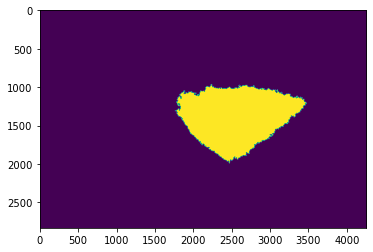

In [7]:
# Load image
image_to_load = os.path.join(folder_to_load, files_to_load[0])
img = io.imread(image_to_load)

# apply threshold
bw = closing(img > thresh, square(4))

# remove artifacts connected to image border
#cleared = remove_small_objects(clear_border(bw), 1)
cleared = remove_small_objects(bw, 1000)

# label image regions
label_image = label(cleared)

print('Area = '+str(np.sum(cleared))+' pixels')
print('Area = '+str(np.round(np.sum(cleared)/(pix_per_mm**2), 2))+' mm^2')

plt.figure();
#plt.imshow(bw)
plt.imshow(cleared)

### Anisotropic growth

Key challenge: define a point of origin. Ideas: <br>
* Center of mass of first image.
* Try a range of origin points and evaluate results.

### Centre of mass dynamics

In [9]:
# Calculate center of mass (in y direction) for 1 image
# cleared
[y, x] = np.where(cleared)
cm_y = np.mean(y) # equals: 1/np.sum(cleared)*np.sum(y)
cm_y

1263.7160136815921

## Apply to all images

In [37]:
# Read previously saved data
# folder = '/Users/dang/Documents/Projects/Tabler_skull/Scripts/Simulation_plots/data/'
folder = '/Users/dang/Documents/Projects/Tabler_skull/Manuscript_cell_mvt_model/plots/flat_mount_alignments/'
df_data = pd.read_csv(folder+'df_data.csv', index_col=0)
df_data.head()

,index,time,area,cm_y,cm_x
0,0,13.5,0.643600,1.096018,2.005577
1,1,13.5,0.519617,1.110496,2.029291
2,2,13.5,0.488202,1.124369,2.030331
3,3,13.5,0.498741,1.115053,2.015482
4,4,13.5,0.487373,1.101752,1.981258


In [8]:
# Calculate for a series of images
folder_to_load = "/Users/dang/Documents/Projects/Tabler_skull/Data_fixed_tissue/Skull_expansion_transformed/ref_imgs_Euler_run1"
# folder_to_load = "/Users/dang/Documents/Projects/Tabler_skull/Data_fixed_tissue/Skull_expansion_transformed/E13.0_Euler"
# folder_to_load = "/Users/dang/Documents/Projects/Tabler_skull/Data_fixed_tissue/Skull_expansion_transformed/E14.0_Euler"
# folder_to_load = "/Users/dang/Documents/Projects/Tabler_skull/Data_fixed_tissue/Skull_expansion_transformed/E14.5_Euler"
# folder_to_load = "/Users/dang/Documents/Projects/Tabler_skull/Data_fixed_tissue/Skull_expansion_transformed/E15.0_Euler"
# folder_to_load = "/Users/dang/Documents/Projects/Tabler_skull/Data_fixed_tissue/Skull_expansion_transformed/E15.5_Euler"

files = os.listdir( folder_to_load )
files.sort()
files_to_load = [];
for i in range(len(files)):
    if files[i].endswith('.tif'):
        files_to_load.append(files[i])
files_to_load

['E13.0_vs_-ch0.tif',
 'E14.0_vs_E13.0-ch0.tif',
 'E14.5_vs_E14.0-ch0.tif',
 'E15.0_vs_E14.5-ch0.tif',
 'E15.5_vs_E15.0-ch0.tif']

In [51]:
# print list of all files
# subfolders= ["E13.5_Euler", "E14.0_Euler", "E14.5_Euler", "E15.0_Euler", "E15.5_Euler"];
# for i_sub in range(len(subfolders)):
#     # Get list of files
#     folder_base = "/Users/dang/Documents/Projects/Tabler_skull/Data_skull_expansion/series1_transformed/"
#     folder_to_load = folder_base + subfolders[i_sub];
#     files = os.listdir( folder_to_load )
#     files.sort()
#     files_to_load = [];
#     for i in range(len(files)):
#         if files[i].endswith('.tif'):
#             files_to_load.append(files[i])
#             print(files[i])
#     #print(files_to_load)

E13.0_170919_Skull_1_ref.tif
E13.0_170919_Skull_2_thresholded_aligned-ch0.tif
E13.0_170919_Skull_3_aligned-ch0.tif
E13.0_180220_Skull_1L_aligned-ch0.tif
E13.0_180220_Skull_1R_aligned-ch0.tif
E13.0_180220_Skull_2L_aligned-ch0.tif
E13.0_180220_Skull_2R_aligned-ch0.tif
E13.0_180220_Skull_3_aligned-ch0.tif
E14.0_170919_Skull_2L_thresholded_aligned-ch0.tif
E14.0_170919_Skull_3_thresholded_aligned-ch0.tif
E14.0_170919_Skull_4_thresholded_aligned-ch0.tif
E14.0_180220_Skull_1L_thresholded_aligned-ch0.tif
E14.0_180220_Skull_1R_thresholded_aligned-ch0.tif
E14.0_180220_Skull_2_thresholded_aligned-ch0.tif
E14.0_180220_Skull_3_thresholded_aligned-ch0.tif
E14.0_vs_E13.0-ch0.tif
E14.5_170919_Skull_1R_thresholded_aligned-ch0.tif
E14.5_170919_Skull_2L_thresholded_aligned-ch0.tif
E14.5_vs_E14.0-ch0.tif
E15.0_071019_Skull_3L_thresholded_aligned-ch0.tif
E15.0_071019_Skull_3R_thresholded_aligned-ch0.tif
E15.0_071019_Skull_4L_thresholded_aligned-ch0.tif
E15.0_071019_Skull_4R_thresholded_aligned-ch0.tif
E15.

In [49]:
pix_per_mm = 1.27*10**3
areas_all = [] #[None for _ in range(len(files_to_load))];
cm_y_all = [] #[None for _ in range(len(files_to_load))];
cm_x_all = [] #[None for _ in range(len(files_to_load))];
subfolders= ["E13.0_Euler", "E14.0_Euler", "E14.5_Euler", "E15.0_Euler", "E15.5_Euler"];

for i_sub in range(len(subfolders)):
    # Get list of files
    #folder_base = "/Users/dang/Documents/Projects/Tabler_skull/Data_fixed_tissue/Skull_expansion_transformed/"
    folder_base = "/Users/dang/Documents/Projects/Tabler_skull/Data_skull_expansion/series1_transformed/"
    folder_to_load = folder_base + subfolders[i_sub];
    files = os.listdir( folder_to_load )
    files.sort()
    files_to_load = [];
    for i in range(len(files)):
        if files[i].endswith('.tif'):
            files_to_load.append(files[i])
    print(files_to_load)
    
    # Define vars
    areas = np.zeros(len(files_to_load))
    cm_ys = np.zeros(len(files_to_load))
    cm_xs = np.zeros(len(files_to_load))

    from skimage import io
    from skimage import data
    #from skimage.filters import threshold_otsu
    from skimage.segmentation import clear_border
    from skimage.measure import label
    from skimage.morphology import closing, square, remove_small_objects

    # User input
    # folder_to_load = "/Users/dang/Documents/Projects/Tabler_skull/Data_fixed_tissue/Data_Allyson_thresholded/selected_images/"
    labels_all = [];
    for i in range(len(files_to_load)):
        thresh = 5; # manual intensity threshold

        # Load image
        image_to_load = os.path.join(folder_to_load, files_to_load[i])
        img = io.imread(image_to_load)

        # apply threshold
        bw = closing(img > thresh, square(4))

        # remove artifacts connected to image border
        cleared = remove_small_objects(bw, 10)
        
        # Calculate quantities
        areas[i] = np.sum(cleared)/(pix_per_mm**2);
        [y, x] = np.where(cleared)
        cm_ys[i] = np.mean(y)/pix_per_mm
        cm_xs[i] = np.mean(x)/pix_per_mm
        
    # add to list
    areas_all.append(areas);
    cm_y_all.append(cm_ys);
    cm_x_all.append(cm_xs);
    

In [10]:
# Tidy data for plotting
df_data = pd.DataFrame([])

times = [13.5, 14.0, 14.5, 15.0, 15.5]
for i in range(len(times)):
    # areas
    df_temp = pd.DataFrame([np.ones(areas_all[i].shape[0])*times[i], areas_all[i], cm_y_all[i], cm_x_all[i]]).T
    df_temp.columns = ['time', 'area', 'cm_y', 'cm_x']
    df_data = df_data.append(df_temp)
    
#df_data.columns = ['time', 'area']

df_data = df_data.reset_index()

In [11]:
df_data

,index,time,area,cm_y,cm_x
0,0,13.5,0.643600,1.096018,2.005577
1,1,13.5,0.519617,1.110496,2.029291
2,2,13.5,0.488202,1.124369,2.030331
3,3,13.5,0.498741,1.115053,2.015482
4,4,13.5,0.487373,1.101752,1.981258
5,5,13.5,0.339981,1.134106,2.017758
6,6,13.5,0.306323,1.148331,2.027959
7,7,13.5,0.459981,1.121239,2.008038
8,0,14.0,0.854631,1.095650,2.022214
9,1,14.0,0.997257,1.082608,2.004978


In [41]:
# For saving plots
# save_folder = '/Users/dang/Documents/Projects/Tabler_skull/Manuscript_cell_mvt_model/plots/flat_mount_alignments/'
# save_folder = '/Users/dang/Documents/Projects/Tabler_skull/Scripts/Simulation_plots/data/'
save_folder = '/Users/dang/Documents/Projects/Tabler_skull/Data_skull_expansion/Analysed_data/'

# save tidied data
#df_data.to_csv(save_folder+'df_data.csv')

In [45]:
#df_data
df_data.to_excel(save_folder+'df_data.xlsx')

### Plot areas

In [15]:
# plt.figure();
# for i in range(len(times)):
#     plt.scatter(times[i]*np.ones( areas_all[i].shape[0] ), areas_all[i])
# plt.show()

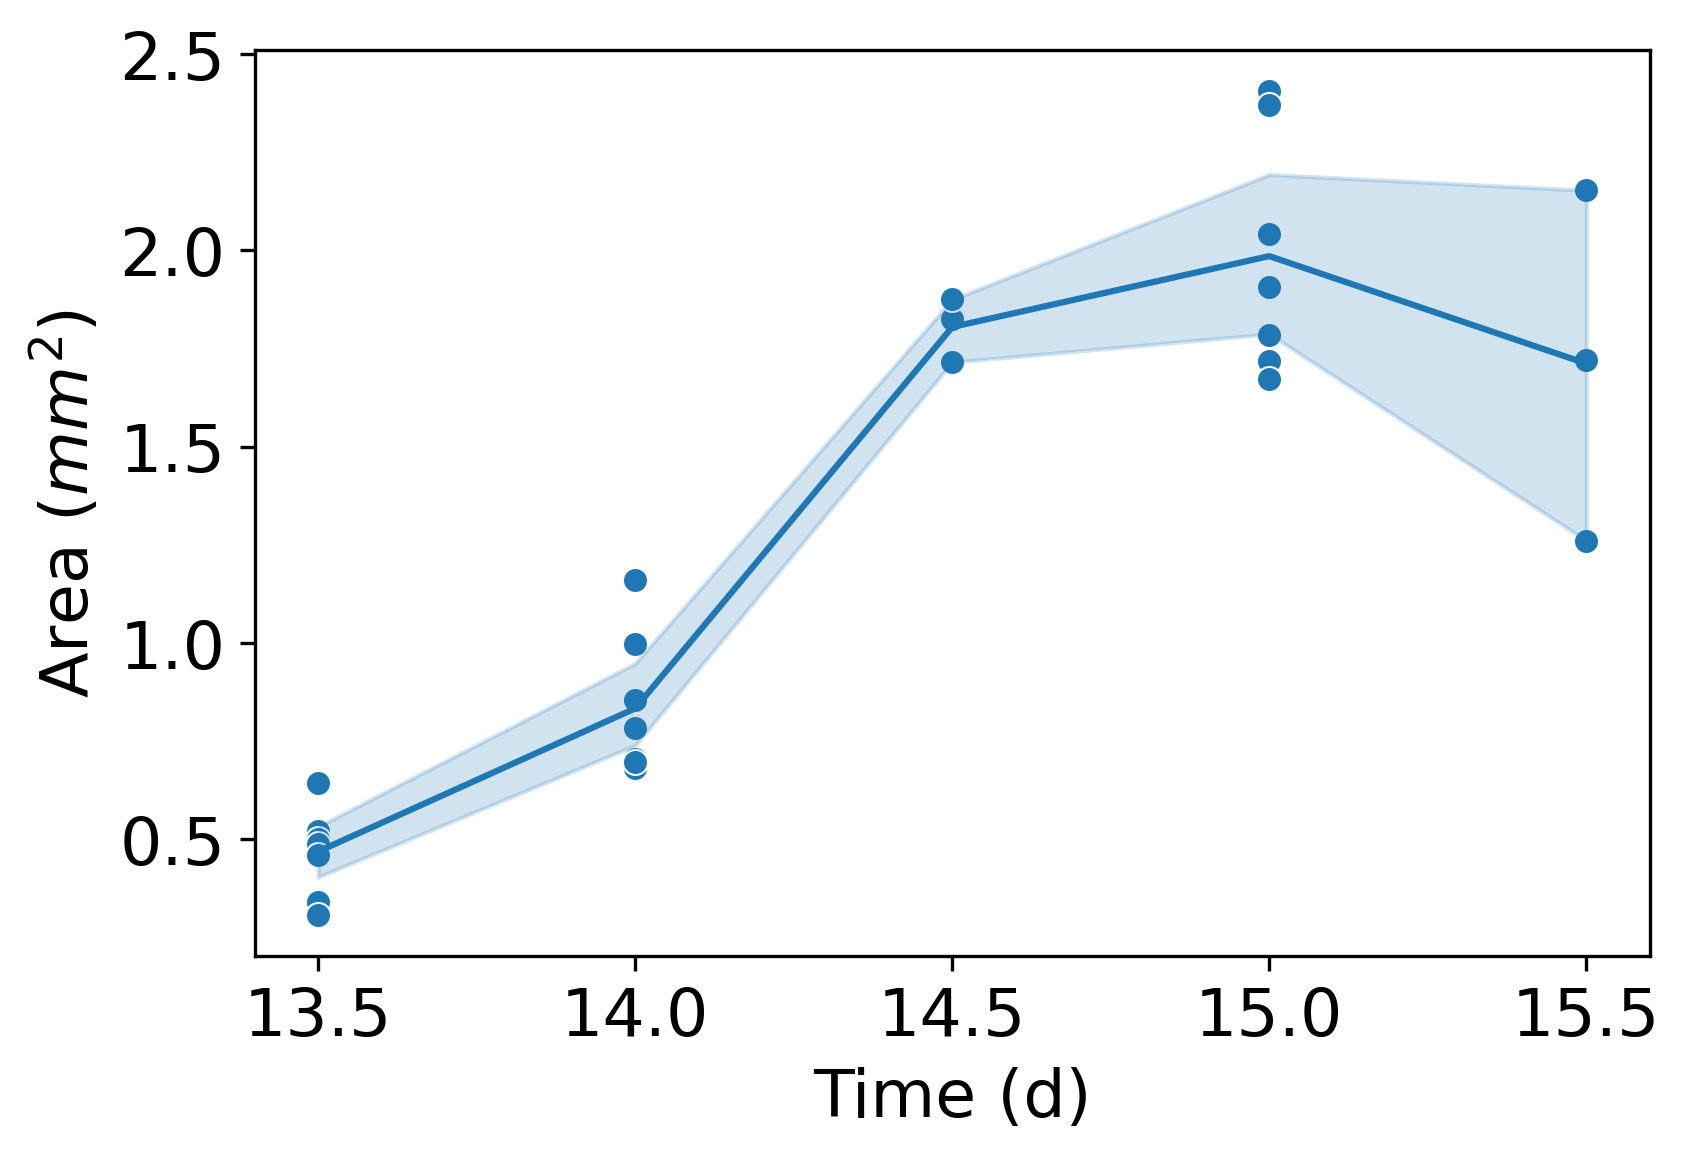

In [15]:
import seaborn as sns
plt.figure(dpi=300)
plt.rc('font', size=16) 
sns.scatterplot(data=df_data, x="time", y="area")
sns.lineplot(data=df_data, x="time", y="area", estimator=np.mean )
plt.xlabel('Time (d)')
plt.ylabel('Area ($mm^2$)')
#plt.savefig(save_folder+'areas.pdf')
plt.show()

### Plot center of mass

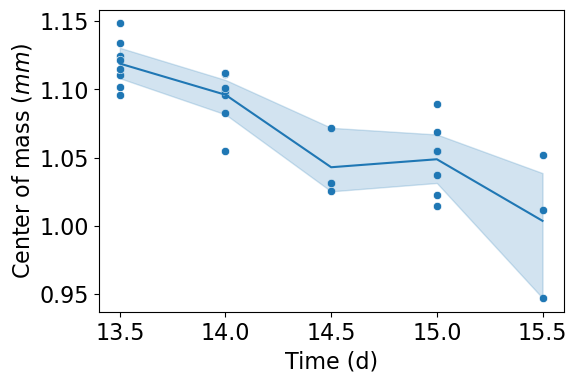

In [16]:
# Center of mass y (raw data)
plt.figure(dpi=100)
sns.scatterplot(data=df_data, x="time", y="cm_y")
sns.lineplot(data=df_data, x="time", y="cm_y", estimator=np.mean )
plt.xlabel('Time (d)')
plt.ylabel('Center of mass ($m m$)')
plt.show()

In [17]:
# rescale and flip the data so average value at earliest time point is zero
cm_y_avg = df_data[ df_data['time']==13.5 ]['cm_y'].mean()
df_data_2 = df_data.copy()
df_data_2['cm_y'] = cm_y_avg-df_data['cm_y']

# Also rescale x axis
cm_x_avg = df_data[ df_data['time']==13.5 ]['cm_x'].mean()
df_data_2['cm_x'] = df_data['cm_x']-cm_x_avg

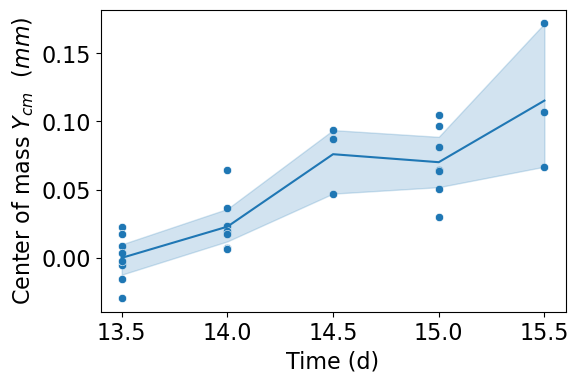

In [18]:
# Center of mass y (rescaled data)
plt.figure(dpi=100)
sns.scatterplot(data=df_data_2, x="time", y="cm_y")
sns.lineplot(data=df_data_2, x="time", y="cm_y", estimator=np.mean )
plt.xlabel('Time (d)')
plt.ylabel('Center of mass $Y_{cm}$  ($m m$)')
plt.show()

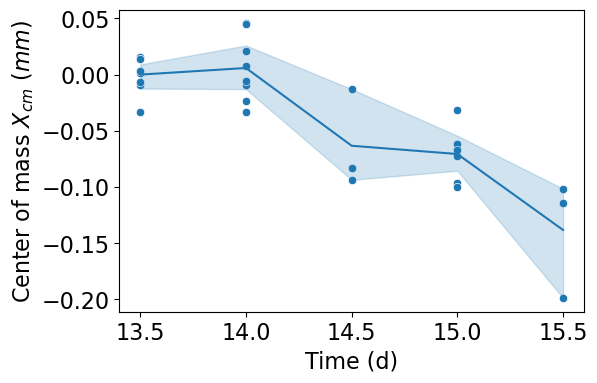

In [19]:
# Center of mass y (rescaled data)
plt.figure(dpi=100)
sns.scatterplot(data=df_data_2, x="time", y="cm_x")
sns.lineplot(data=df_data_2, x="time", y="cm_x", estimator=np.mean )
plt.xlabel('Time (d)')
plt.ylabel('Center of mass $X_{cm}$ ($m m$)')
plt.show()

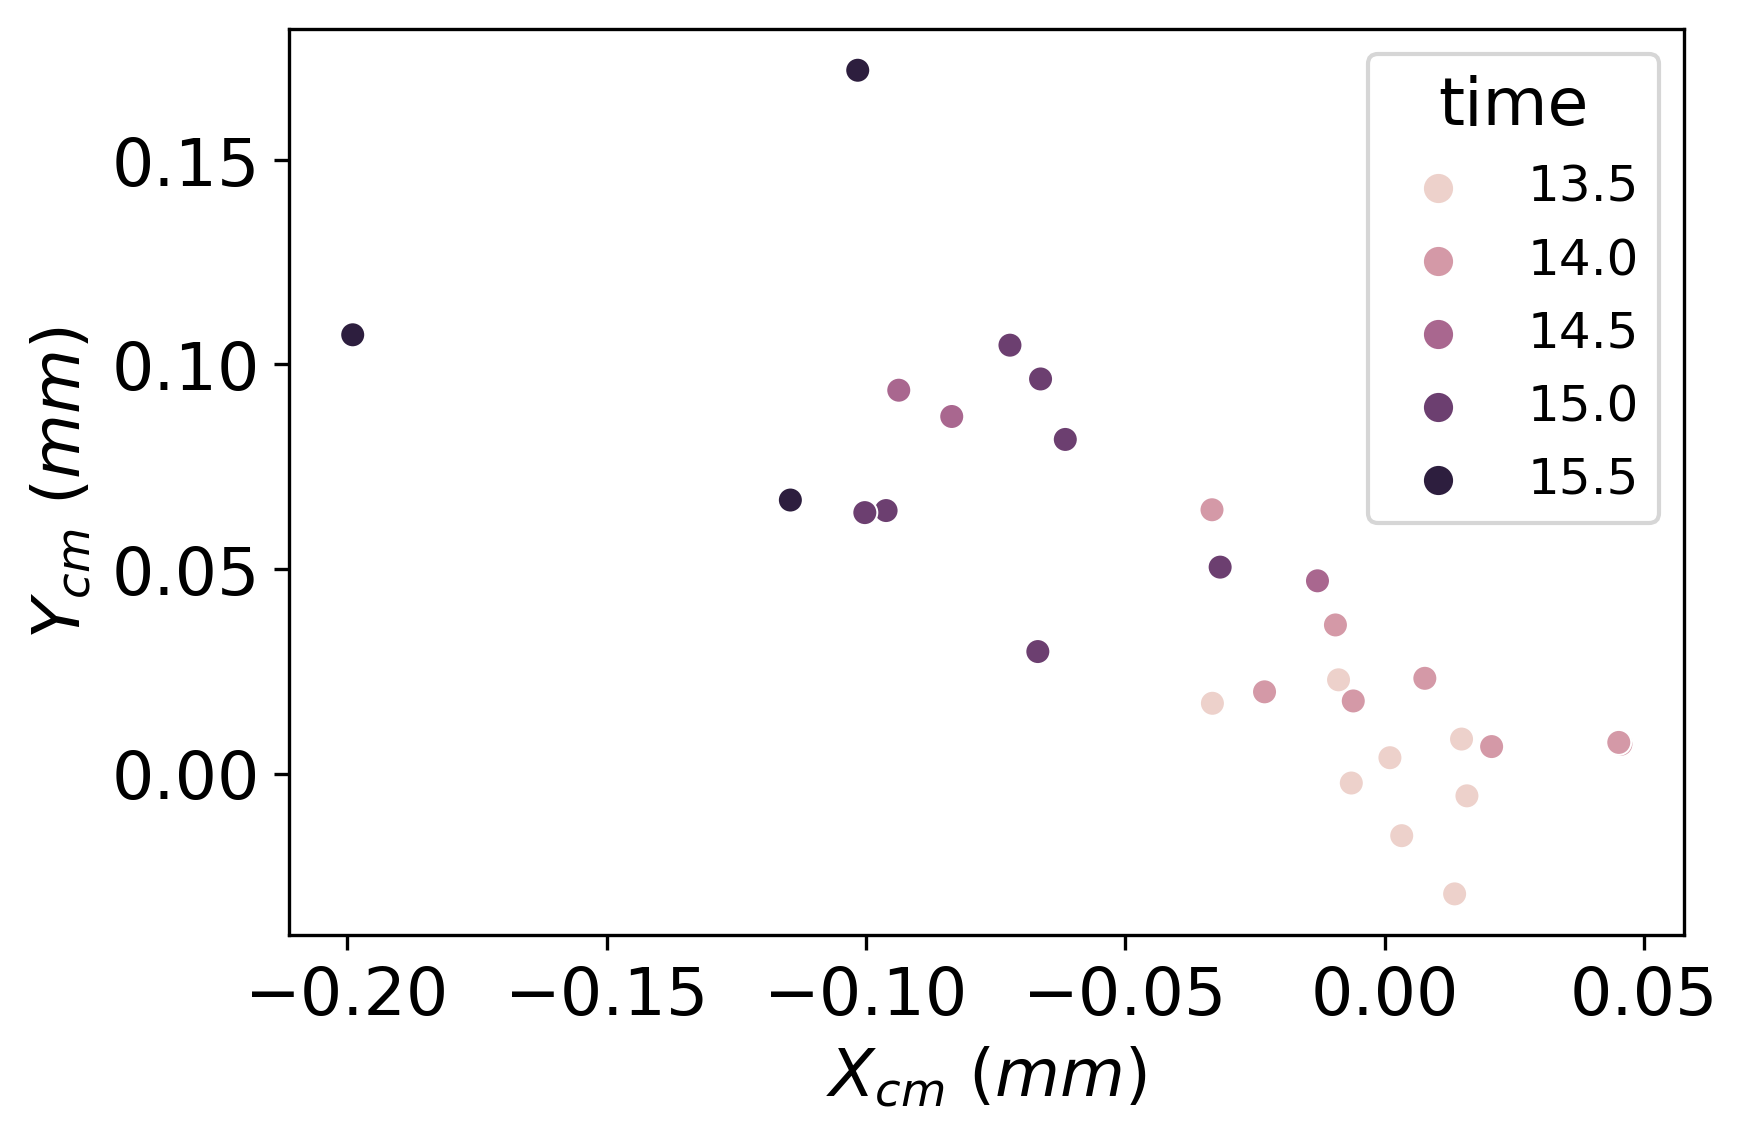

In [20]:
# Center of mass y (rescaled data)
plt.figure(dpi=300)
plt.rc('font', size=16) 
plt.rc('legend', fontsize=12)
#plt.tight_layout()
sns.scatterplot(data=df_data_2, x="cm_x", y="cm_y", hue='time')
plt.xlabel('$X_{cm}$ ($m m$)')
plt.ylabel('$Y_{cm}$ ($m m$)')
#plt.savefig(save_folder+'com_displacement_all_scatter.pdf', bbox_inches="tight")
plt.show()

In [22]:
df_data_2['delta_cm'] = np.sqrt(df_data_2['cm_x']**2+df_data_2['cm_y']**2)
df_data_2

,index,time,area,cm_y,cm_x,delta_cm
0,0,13.5,0.643600,0.022902,-0.008885,0.024565
1,1,13.5,0.519617,0.008425,0.014830,0.017056
2,2,13.5,0.488202,-0.005449,0.015869,0.016779
3,3,13.5,0.498741,0.003868,0.001020,0.004000
4,4,13.5,0.487373,0.017168,-0.033204,0.037380
5,5,13.5,0.339981,-0.015186,0.003296,0.015539
6,6,13.5,0.306323,-0.029411,0.013497,0.032360
7,7,13.5,0.459981,-0.002318,-0.006423,0.006829
8,0,14.0,0.854631,0.023271,0.007752,0.024528
9,1,14.0,0.997257,0.036312,-0.009483,0.037530


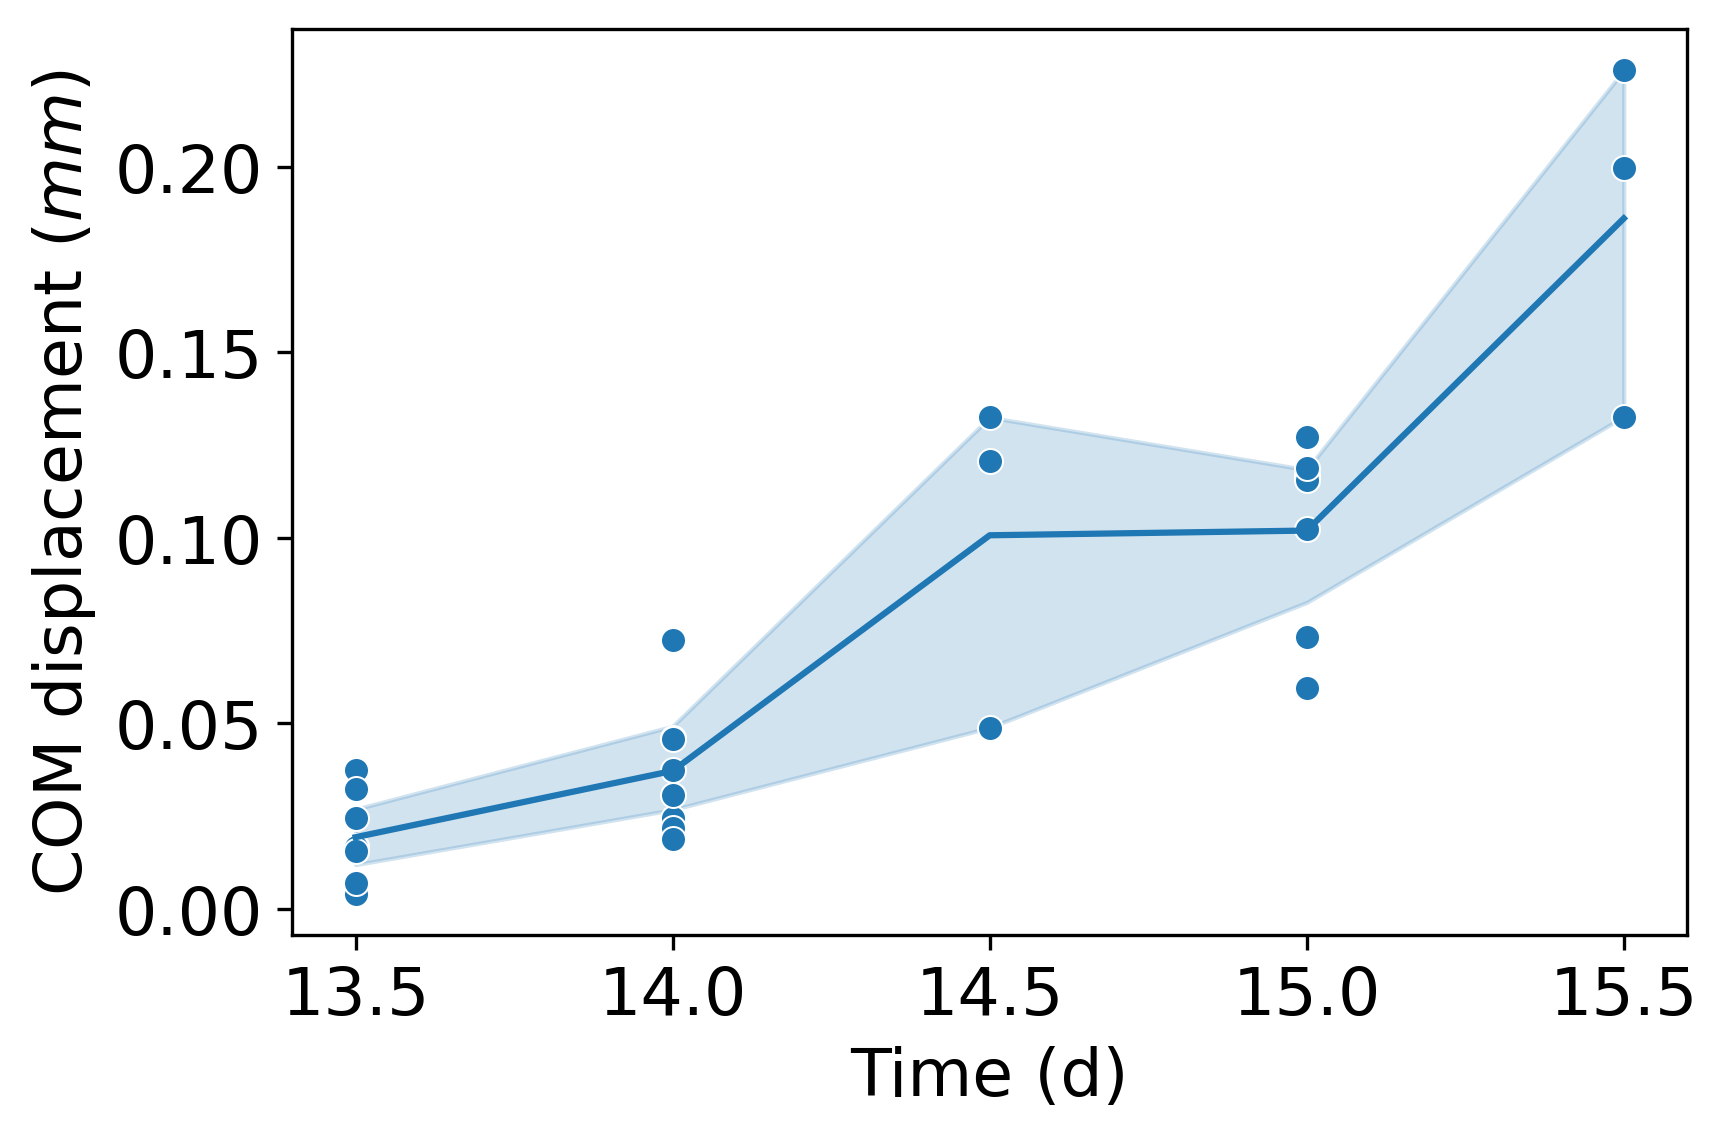

In [23]:
# Center of mass y (rescaled data)
plt.figure(dpi=300)
plt.rc('font', size=16)
sns.lineplot(data=df_data_2, x="time", y="delta_cm", estimator=np.mean )
sns.scatterplot(data=df_data_2, x="time", y="delta_cm")
plt.xlabel('Time (d)')
plt.ylabel('COM displacement ($m m$)')
#plt.ylabel('$\sqrt{X_{cm}^2+Y_{cm}^2}$ ($m m$)')
#plt.savefig(save_folder+'com_displacement_all_vs_time_2.pdf', bbox_inches="tight")
plt.show()

In [37]:
X

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.],
       [1., 5.],
       [1., 6.]])

In [43]:
# Fit linear model and perform t-test
from statsmodels.regression import linear_model
from statsmodels.api import add_constant

Y = df_data_2['delta_cm'].values
X = df_data_2['time'].values - min(df_data_2['time'].values)

model = linear_model.OLS(Y, X)
results = model.fit()

print(results.params)
print(results.pvalues)

[0.08054729]
[2.46108686e-15]


In [45]:
# Correlation t-test (manual)
r = df_data_2.corr()['time']['delta_cm']
print('Pearson corr = ',r)
n = df_data_2.shape[0]
t = r*np.sqrt((n-2) / (1-r**2) );
print('t score = ', t)

# look up p value in table https://en.wikipedia.org/wiki/Student%27s_t-distribution#Table_of_selected_values


Pearson corr =  0.8711279357744626
t score =  9.21791479297749


# Plots areas WT vs BAPN

## Load area data

In [5]:
save_folder = "/Users/dang/Documents/Projects/Tabler_skull/Data_skull_expansion/plots/"

In [38]:
# Load old data
#load_folder = '/Users/dang/Documents/Projects/Tabler_skull/Manuscript_cell_mvt_model/plots/flat_mount_alignments/'
load_folder = "/Users/dang/Documents/Projects/Tabler_skull/Data_skull_expansion/Analysed_data/"
df_1 = pd.read_excel(load_folder+'Skull_expansion_1_annotated.xlsx', index_col=0)
df_1['Condition'] = 'WT'
df_1.loc[df_1['BoneID']=='Left', 'BoneID'] = 'L'
df_1.loc[df_1['BoneID']=='Right', 'BoneID'] = 'R'
df_1['Experimenter'] = 'Adrian'
df_1.head()

,index,time,Condition,Channel,Date,Sample,BoneID,Thresholds,FileID,FileID2,Area,Perimeter,Old_Area,Old_perimeter,Experimenter
0,0,13.5,WT,Sp7mCherry,2019-09-17,E13.0_170919_1,NaN,"[0, 2200]",E13.0_170919_Skull_1,E13.0_170919_Skull_1_ref.tif,0.639380,11.904820,0.63938,11.904820,Adrian
1,1,13.5,WT,Sp7mCherry,2019-09-17,E13.0_170919_2,NaN,"[0, 2200]",E13.0_170919_Skull_2,NaN,0.512251,10.472996,0.517667,7.408513,Adrian
2,2,13.5,WT,Sp7mCherry,2019-09-17,E13.0_170919_3,NaN,"[0, 2200]",E13.0_170919_Skull_3,NaN,0.480631,10.877086,0.486421,7.060595,Adrian
3,3,13.5,WT,Sp7mCherry,2020-02-18,E13.0_180220_1,L,"[0, 2200]",E13.0_180220_Skull_1L,NaN,0.490850,11.042664,0.497522,7.042852,Adrian
4,4,13.5,WT,Sp7mCherry,2020-02-18,E13.0_180220_1,R,"[0, 2200]",E13.0_180220_Skull_1R,NaN,0.479995,10.682885,0.485583,6.688785,Adrian


In [39]:
# Load new data
load_folder = "/Users/dang/Documents/Projects/Tabler_skull/Data_skull_expansion/Analysed_data/"
load_file = load_folder+"Skull_expansion_2_annotated.xlsx"
df_2 = pd.read_excel(load_file, index_col=0)
df_2['Area'] = df_2['Area_micron2']/(10**6)
df_2['Perimeter'] = df_2['Perimeter_micron']/(10**3)
df_2['Experimenter'] = 'Johanna'
df_2.head()

,index,time,Condition,Channel,Date,Sample,BoneID,Thresholds,FileID,FileID2,Area_micron2,Perimeter_micron,Quality,Area,Perimeter,Experimenter
0,1.0,13.5,WT,Sp7mCherry,2022-01-10,Control_E13.5_mCh_1,L,Otsu,100122_BC_0_500_T_Otsu_01,NaN,454133.212,24782.784,NaN,0.454133,24.782784,Johanna
1,2.0,13.5,WT,Sp7mCherry,2022-01-10,Control_E13.5_mCh_1,R,Otsu,100122_BC_0_500_T_Otsu_02,NaN,456567.621,19596.649,NaN,0.456568,19.596649,Johanna
2,3.0,13.5,WT,Sp7mCherry,2022-01-10,Control_E13.5_mCh_2,L,Otsu,100122_BC_0_500_T_Otsu_03,NaN,310146.103,16654.332,NaN,0.310146,16.654332,Johanna
3,4.0,13.5,WT,Sp7mCherry,2022-01-10,Control_E13.5_mCh_2,R,Otsu,100122_BC_0_500_T_Otsu_04,NaN,340436.899,18639.151,NaN,0.340437,18.639151,Johanna
4,5.0,13.5,WT,Sp7mCherry,2022-01-10,Control_E13.5_mCh_3,L,Otsu,100122_BC_0_500_T_Otsu_05,NaN,282999.884,15060.089,NaN,0.283000,15.060089,Johanna


In [40]:
df_all = pd.concat( [df_1, df_2], join='inner').reset_index(drop=True)

# remove cut BAPN-2 samples
#df_all = df_all[ df_all['Sample']!='BAPN-2']
df_all

,index,time,Condition,Channel,Date,Sample,BoneID,Thresholds,FileID,FileID2,Area,Perimeter,Experimenter
0,0.0,13.5,WT,Sp7mCherry,2019-09-17,E13.0_170919_1,NaN,"[0, 2200]",E13.0_170919_Skull_1,E13.0_170919_Skull_1_ref.tif,0.639380,11.904820,Adrian
1,1.0,13.5,WT,Sp7mCherry,2019-09-17,E13.0_170919_2,NaN,"[0, 2200]",E13.0_170919_Skull_2,NaN,0.512251,10.472996,Adrian
2,2.0,13.5,WT,Sp7mCherry,2019-09-17,E13.0_170919_3,NaN,"[0, 2200]",E13.0_170919_Skull_3,NaN,0.480631,10.877086,Adrian
3,3.0,13.5,WT,Sp7mCherry,2020-02-18,E13.0_180220_1,L,"[0, 2200]",E13.0_180220_Skull_1L,NaN,0.490850,11.042664,Adrian
4,4.0,13.5,WT,Sp7mCherry,2020-02-18,E13.0_180220_1,R,"[0, 2200]",E13.0_180220_Skull_1R,NaN,0.479995,10.682885,Adrian
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,4.7,15.5,BAPN,OsxGFP,2022-05-17,BAPN_E15.5_8,Left,Huang2_precropped,NaN,NaN,3.357135,60.992685,Johanna
111,5.3,15.5,BAPN,OsxGFP,2022-05-17,BAPN_E15.5_8,Right,Huang2_precropped,NaN,NaN,2.942522,79.524003,Johanna
112,5.9,15.5,BAPN,OsxGFP,2022-05-17,BAPN_E15.5_11,Right,Huang2_precropped,NaN,NaN,2.938480,83.817843,Johanna
113,6.5,15.5,BAPN,OsxGFP,2022-05-17,BAPN_E15.5_13,Left,Huang2_precropped,NaN,NaN,3.566270,45.024053,Johanna


In [41]:
df_all = df_all[df_all['Experimenter']=='Johanna']

In [42]:
def jitter(values, sigma):
    return values + np.random.normal(0, sigma, values.shape)

df_all['time2']=jitter(df_all.time, 0.05)
df_all['time2'].head()

/var/folders/8z/k5cyvf4j5kl0mzc9vn1gf_2h0000gq/T/ipykernel_20929/2643623686.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['time2']=jitter(df_all.time, 0.05)


35    13.477685
36    13.547814
37    13.531493
38    13.479183
39    13.508480
Name: time2, dtype: float64

## Check for covariates

### Combined data

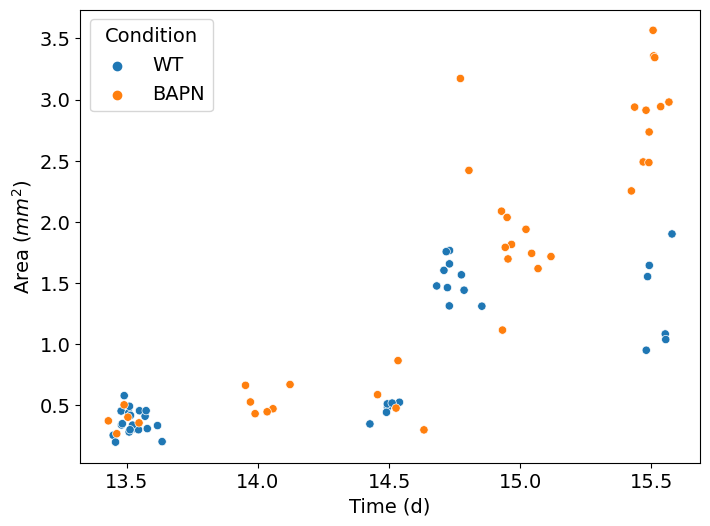

In [50]:
fig, ax = plt.subplots(dpi=100, figsize=(8, 6))
plt.rc('font', size=14) 
#sns.scatterplot(data=df_all, x=jitter(df_all.time, 0.04), y="Area", hue="Condition", x_jitter=0.1, ax=ax)
sns.scatterplot(data=df_all, x="time2", y="Area", hue="Condition", ax=ax)

#sns.lineplot(data=df_data, x="time", y="area", estimator=np.mean )
plt.xlabel('Time (d)')
plt.ylabel('Area ($mm^2$)')
#plt.savefig(save_folder+'areas_jitter_0p4.pdf')
plt.show()

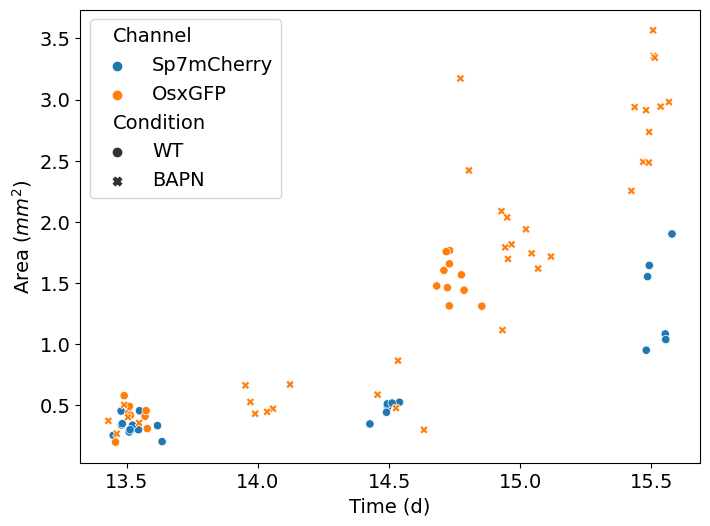

In [44]:
# By Channel
fig, ax = plt.subplots(dpi=100, figsize=(8, 6))
plt.rc('font', size=14) 
sns.scatterplot(data=df_all, x='time2', y="Area", hue="Channel", style="Condition", ax=ax)
plt.xlabel('Time (d)')
plt.ylabel('Area ($mm^2$)')

#plt.savefig(save_folder+'areas_by__new_samples.pdf')
plt.show()

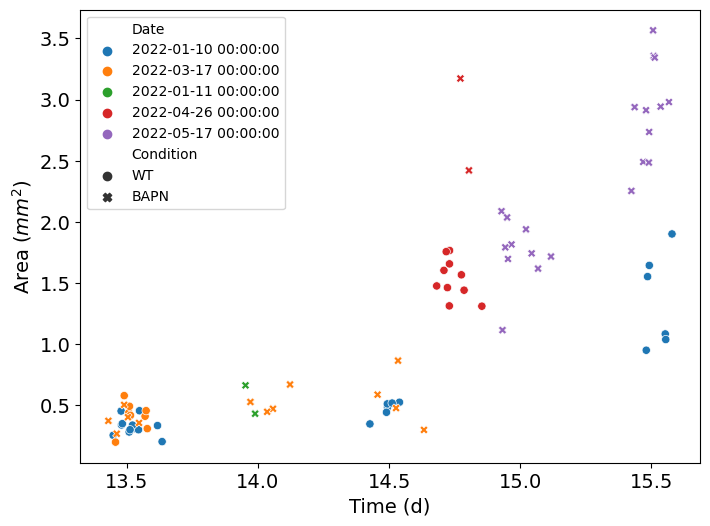

In [45]:
# By date
fig, ax = plt.subplots(dpi=100, figsize=(8, 6))
plt.rc('font', size=14) 
sns.scatterplot(data=df_all, x="time2", y="Area", hue="Date", style='Condition', ax=ax)
plt.xlabel('Time (d)')
plt.ylabel('Area ($mm^2$)')
plt.legend(fontsize=10)
#plt.savefig(save_folder+'areas_by_date_new_samples.pdf')
plt.show()

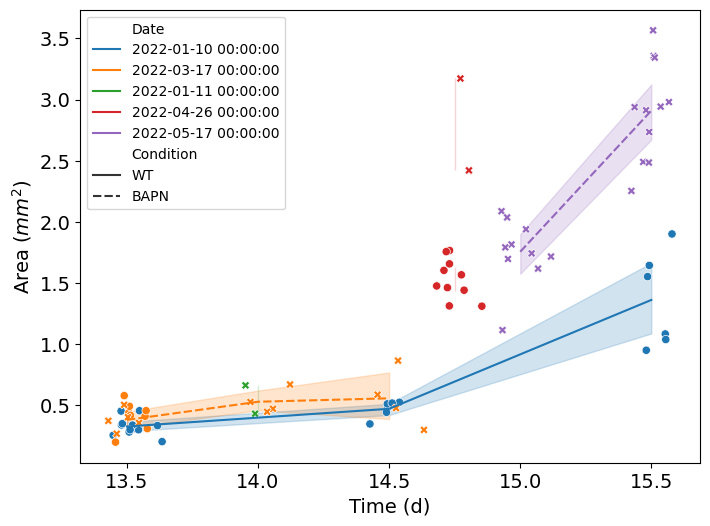

In [46]:
# Merge cells by 
fig, ax = plt.subplots(dpi=100, figsize=(8, 6))
plt.rc('font', size=14) 
#sns.relplot(data=df_all, x="time", y="Area", hue="Date", kind="line")
sns.lineplot(data=df_all, x="time", y="Area", hue="Date", style='Condition', ax=ax)
sns.scatterplot(data=df_all, x="time2", y="Area", hue="Date", style='Condition', ax=ax, legend=False)
plt.xlabel('Time (d)')
plt.ylabel('Area ($mm^2$)')
#plt.legend()
plt.legend(fontsize=10)
#plt.savefig(save_folder+'areas_by_date_new_samples.pdf')
plt.show()

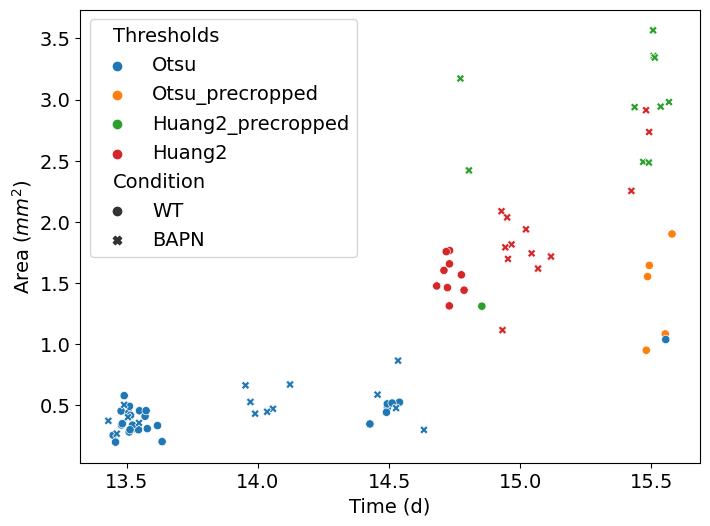

In [47]:
# By Thresholding
fig, ax = plt.subplots(dpi=100, figsize=(8, 6))
plt.rc('font', size=14) 
sns.scatterplot(data=df_all, x="time2", y="Area", hue="Thresholds", style='Condition', ax=ax)
plt.xlabel('Time (d)')
plt.ylabel('Area ($mm^2$)')
#plt.savefig(save_folder+'areas_jitter_0p4.pdf')
plt.show()

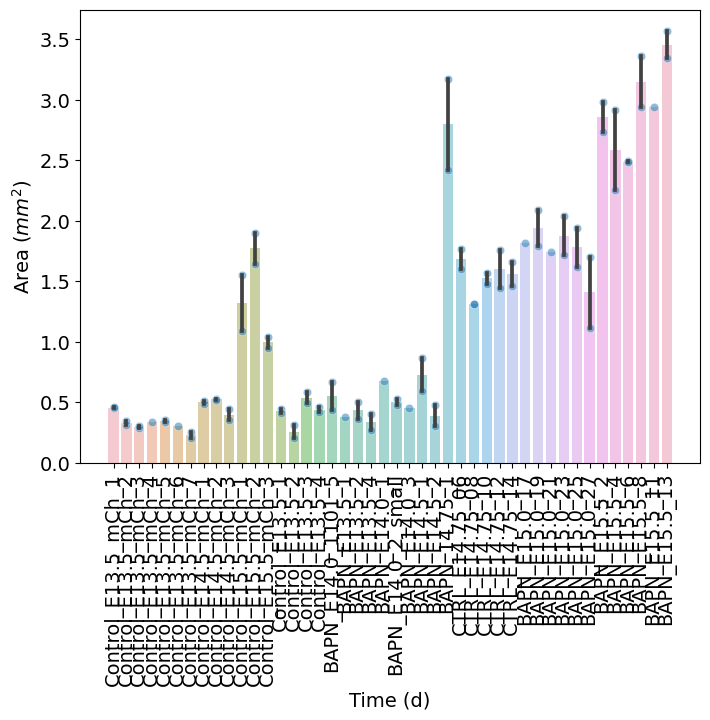

In [48]:
# By Sample
fig, ax = plt.subplots(dpi=100, figsize=(8, 6))
plt.rc('font', size=14) 
sns.barplot(data=df_all, x="Sample", y="Area", alpha=0.5, ax=ax)
sns.scatterplot(data=df_all, x="Sample", y="Area", alpha=0.5, ax=ax)
plt.xlabel('Time (d)')
plt.ylabel('Area ($mm^2$)')
plt.xticks(rotation=90)

#plt.savefig(save_folder+'areas_by__new_samples.pdf')
plt.show()

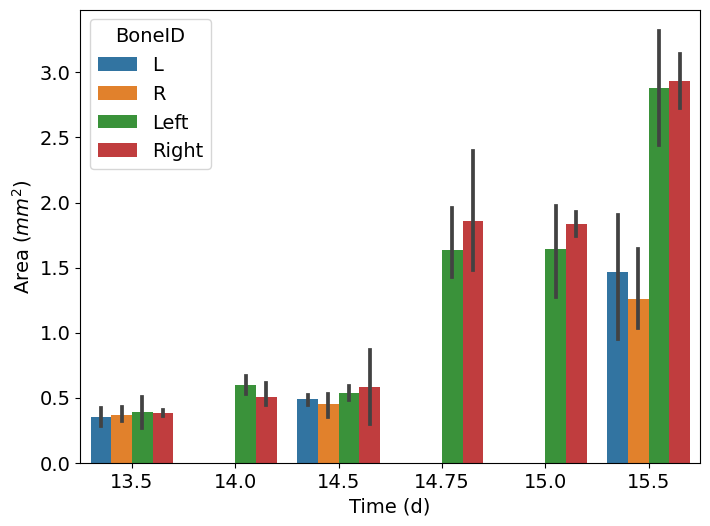

In [49]:
# By BoneID
fig, ax = plt.subplots(dpi=100, figsize=(8, 6))
plt.rc('font', size=14) 
sns.barplot(data=df_all, x="time", y="Area", hue="BoneID", ax=ax)
plt.xlabel('Time (d)')
plt.ylabel('Area ($mm^2$)')
plt.show()

### Old data

In [66]:
df_1.head()

,index,time,Channel,Date,Sample,BoneID,FileID,FileID2,Area,cm_y,cm_x
0,0,13.5,Sp7mCherry,2019-09-17,WT,NaN,E13.0_170919_Skull_1.tif,E13.0_170919_Skull_1_ref.tif,0.643600,1.096018,2.005577
1,1,13.5,Sp7mCherry,2019-09-17,WT,NaN,E13.0_170919_Skull_2_thresholded_aligned-ch0.tif,NaN,0.519617,1.110496,2.029291
2,2,13.5,Sp7mCherry,2019-09-17,WT,NaN,E13.0_170919_Skull_3_aligned-ch0.tif,NaN,0.488202,1.124369,2.030331
3,3,13.5,Sp7mCherry,2020-02-18,WT,Left,E13.0_180220_Skull_1L_aligned-ch0.tif,NaN,0.498741,1.115053,2.015482
4,4,13.5,Sp7mCherry,2020-02-18,WT,Right,E13.0_180220_Skull_1R_aligned-ch0.tif,NaN,0.487373,1.101752,1.981258


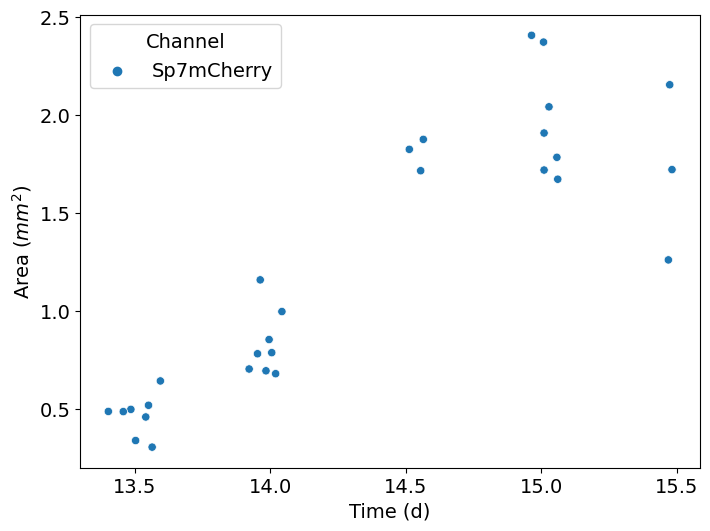

In [76]:
# By Channel
import seaborn as sns
fig, ax = plt.subplots(dpi=100, figsize=(8, 6))
plt.rc('font', size=14) 
sns.scatterplot(data=df_1, x=jitter(df_1.time, 0.04), y="Area", hue="Channel", ax=ax)
plt.xlabel('Time (d)')
plt.ylabel('Area ($mm^2$)')

#plt.savefig(save_folder+'areas_by__new_samples.pdf')
plt.show()

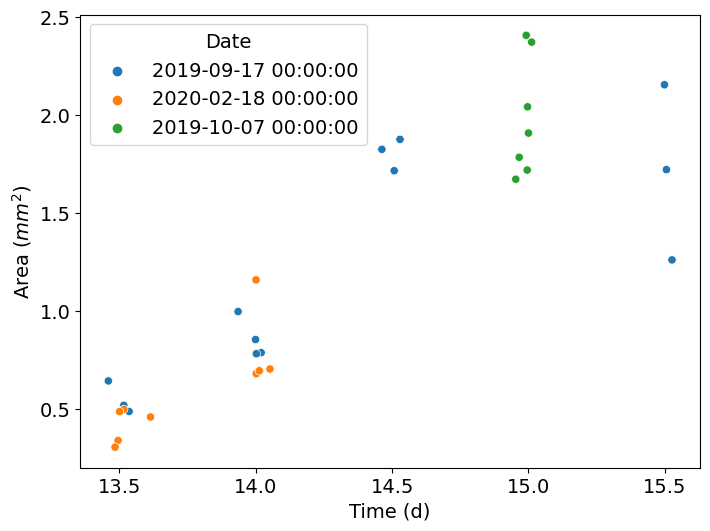

In [75]:
# By date
import seaborn as sns
fig, ax = plt.subplots(dpi=100, figsize=(8, 6))
plt.rc('font', size=14) 
sns.scatterplot(data=df_1, x=jitter(df_1.time, 0.04), y="Area", hue="Date", ax=ax)
plt.xlabel('Time (d)')
plt.ylabel('Area ($mm^2$)')

#plt.savefig(save_folder+'areas_by_date_new_samples.pdf')
plt.show()

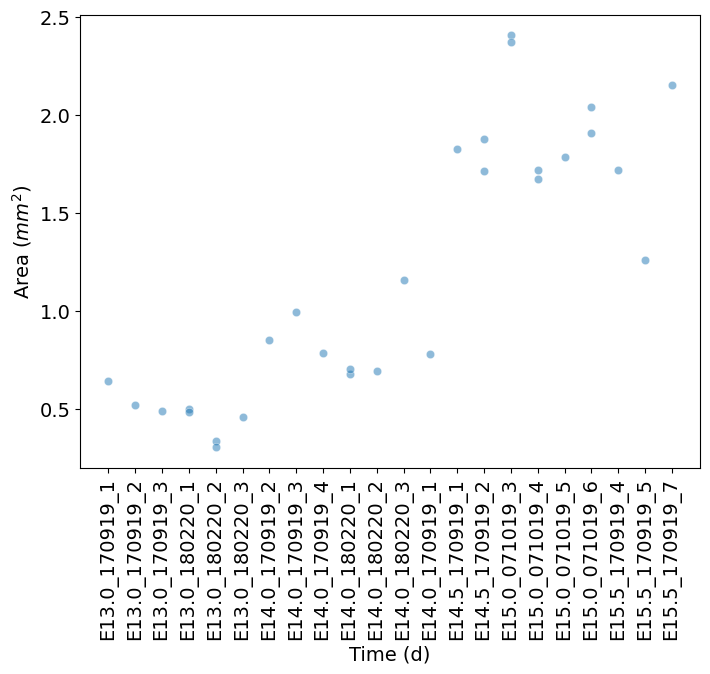

In [84]:
# By Sample
import seaborn as sns
fig, ax = plt.subplots(dpi=100, figsize=(8, 6))
plt.rc('font', size=14) 
sns.scatterplot(data=df_1, x=df_1.Sample, y="Area", alpha=0.5, ax=ax)
plt.xlabel('Time (d)')
plt.ylabel('Area ($mm^2$)')
plt.xticks(rotation=90)
 
#plt.savefig(save_folder+'areas_by__new_samples.pdf')
plt.show()

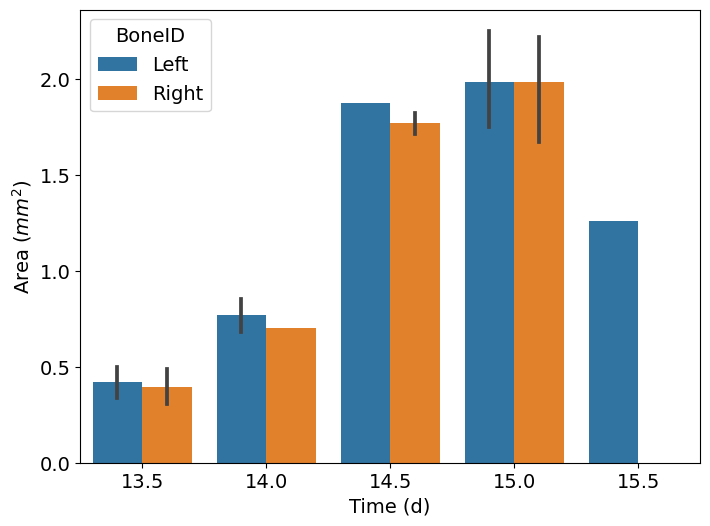

In [74]:
# By BoneID
import seaborn as sns
fig, ax = plt.subplots(dpi=100, figsize=(8, 6))
plt.rc('font', size=14) 
sns.barplot(data=df_1, x=jitter(df_1.time, 0), y="Area", hue="BoneID", ax=ax)
plt.xlabel('Time (d)')
plt.ylabel('Area ($mm^2$)')

#plt.savefig(save_folder+'areas_by__new_samples.pdf')
plt.show()

## Perimeter

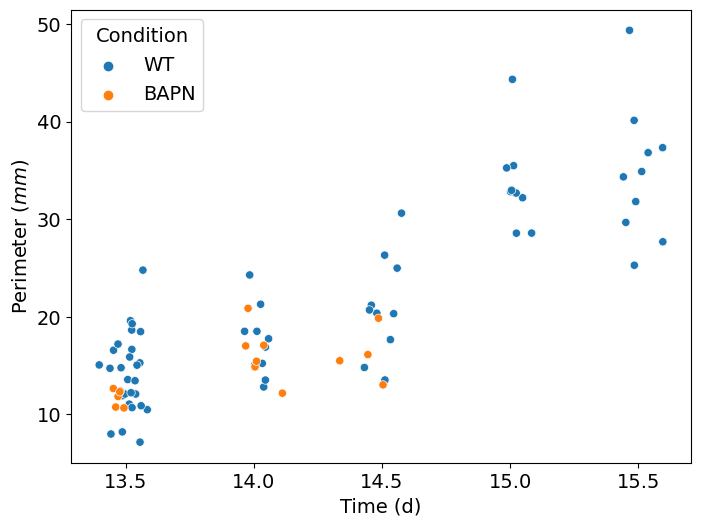

In [68]:
fig, ax = plt.subplots(dpi=100, figsize=(8, 6))
plt.rc('font', size=14)
sns.scatterplot(data=df_all, x="time2", y="Perimeter", hue="Condition", ax=ax)
plt.xlabel('Time (d)')
plt.ylabel('Perimeter ($mm$)')
#plt.savefig(save_folder+'areas_jitter_0p4.pdf')
plt.show()

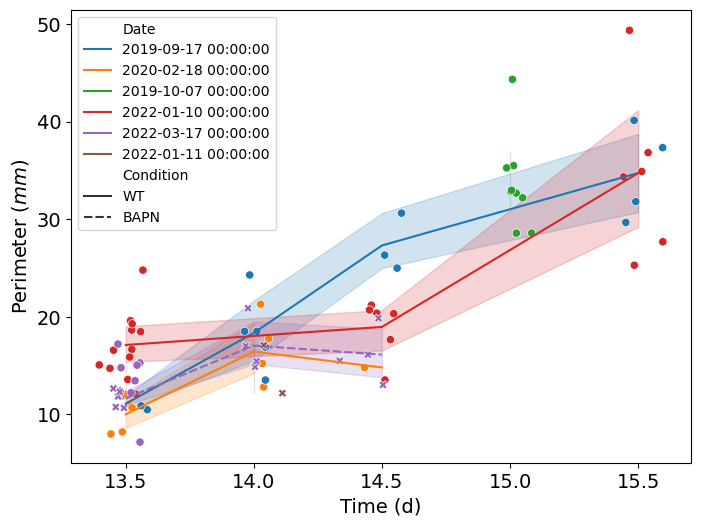

In [69]:
# Merge cells by 
fig, ax = plt.subplots(dpi=100, figsize=(8, 6))
plt.rc('font', size=14) 
sns.lineplot(data=df_all, x="time", y="Perimeter", hue="Date", style='Condition', ax=ax)
sns.scatterplot(data=df_all, x="time2", y="Perimeter", hue="Date", style='Condition', ax=ax, legend=False)
plt.xlabel('Time (d)')
plt.ylabel('Perimeter ($mm$)')
plt.legend(fontsize=10)
#plt.savefig(save_folder+'areas_by_date_new_samples.pdf')
plt.show()

### Perimeter vs Area

In [87]:
x_dat = np.arange(0, 10, 0.2);
geom_dat = pd.DataFrame( [x_dat, x_dat**2/16, x_dat**2/np.pi/4], index=['Perimeter', 'Area square', 'Area circle'] ).T
geom_dat.head()


,Perimeter,Area square,Area circle
0,0.0,0.0000,0.000000
1,0.2,0.0025,0.003183
2,0.4,0.0100,0.012732
3,0.6,0.0225,0.028648
4,0.8,0.0400,0.050930


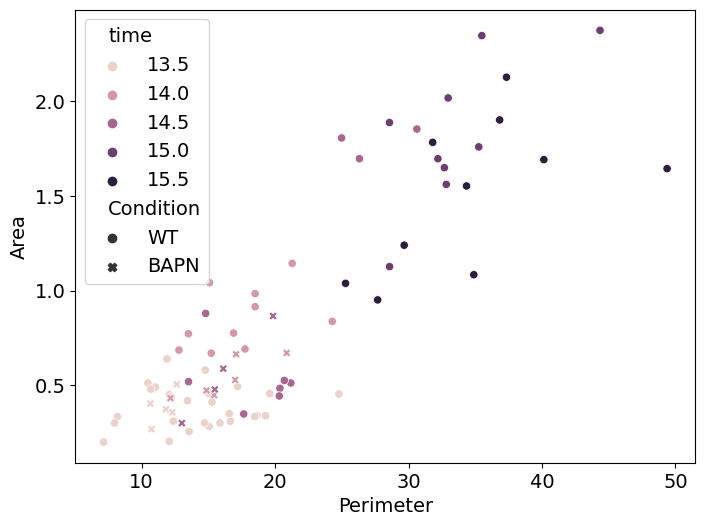

In [89]:
# Corr with area
fig, ax = plt.subplots(dpi=100, figsize=(8, 6))
sns.scatterplot(data=df_all,  x='Perimeter', y='Area', hue='time', style='Condition', ax=ax)
plt.show()

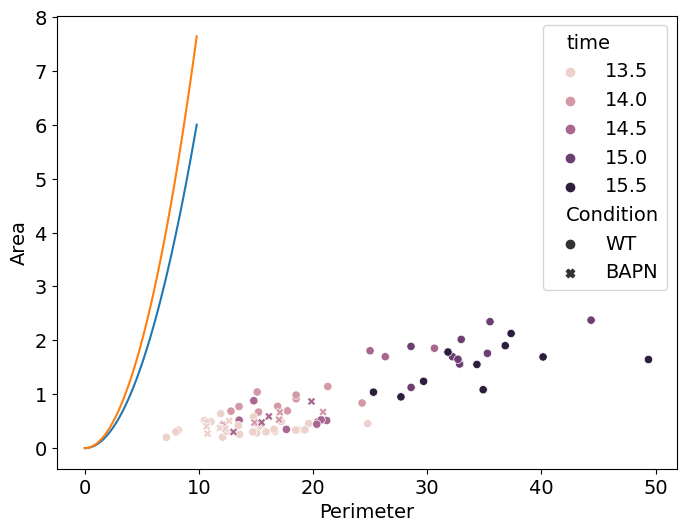

In [92]:
# Corr with area
fig, ax = plt.subplots(dpi=100, figsize=(8, 6))
sns.scatterplot(data=df_all,  x='Perimeter', y='Area', hue='time', style='Condition', ax=ax)
sns.lineplot(data=geom_dat,  x='Perimeter', y='Area square', ax=ax)
sns.lineplot(data=geom_dat,  x='Perimeter', y='Area circle', ax=ax)
plt.show()

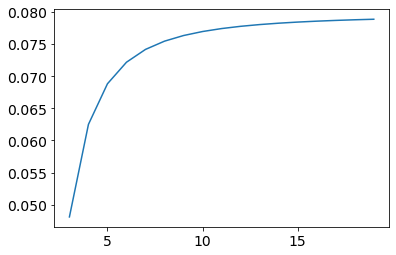

In [104]:
# Regular polygons
# A = coeff * P**2, where coeff depends on n (number of sides)
n_all = range(3, 20)
coeff_all = [np.cos( np.pi / n)/np.sin( np.pi / n)/(4*n) for n in n_all]
plt.plot( n_all, coeff_all )
plt.show()